In [1]:
%matplotlib inline

In [2]:
from urllib.request import urlopen

import numpy as np
import cv2
from matplotlib import pyplot as plt

In [3]:
import albumentations as albu

In [4]:
def download_image(url):
    data = urlopen(url).read()
    data = np.frombuffer(data, np.uint8)
    image = cv2.imdecode(data, cv2.IMREAD_COLOR)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    return image

In [5]:
image = download_image('https://habrastorage.org/webt/pr/-w/ji/pr-wjiqad7gsnyotam8rx5mg3p0.jpeg')

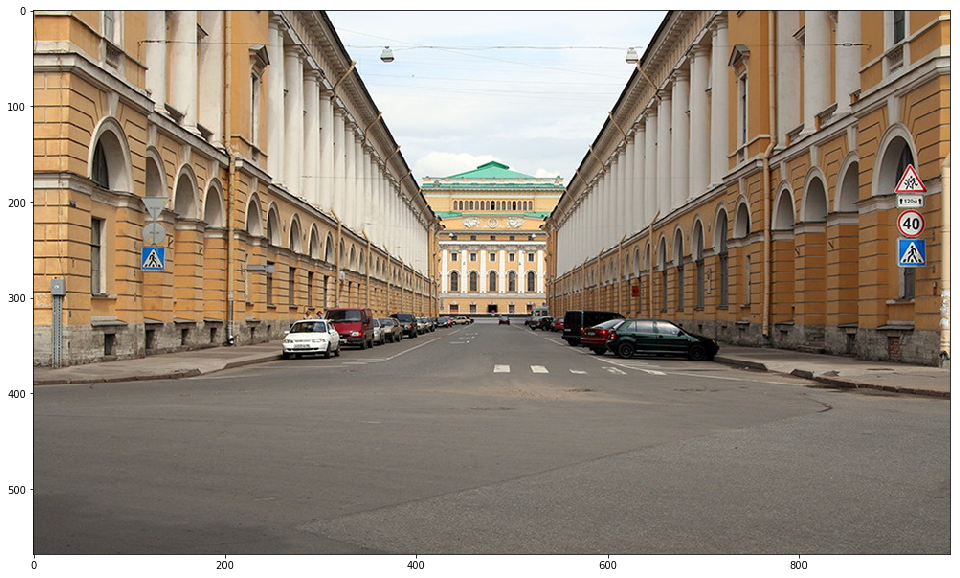

In [6]:
plt.figure(figsize=(20, 10))
plt.imshow(image)
plt.show()

In [7]:
def augment_and_show(aug, image):
    image = aug(image=image)['image']
    plt.figure(figsize=(20, 10))
    plt.imshow(image)

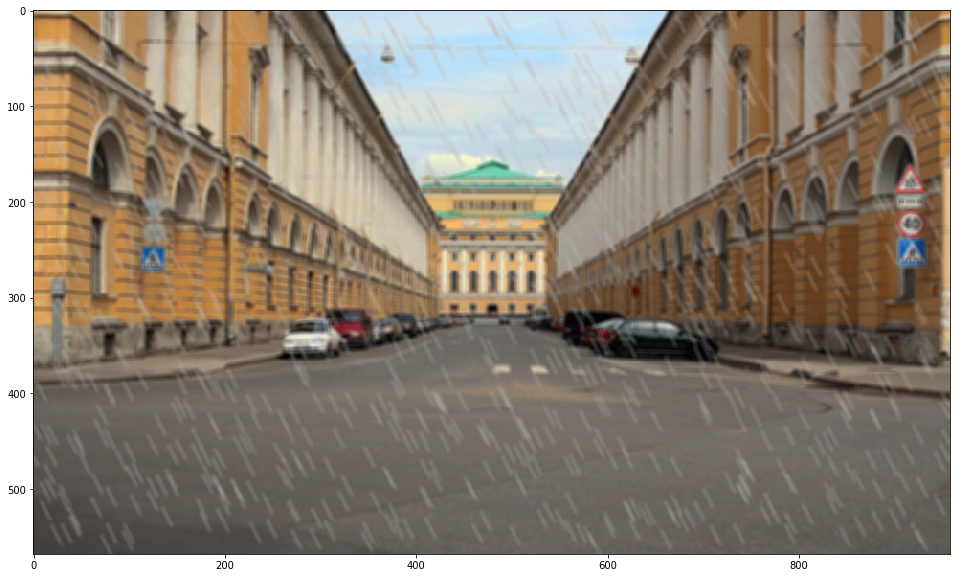

In [8]:
aug = albu.RandomRain(p=1, brightness_coefficient=0.9, drop_width=1, blur_value=5)
augment_and_show(aug, image)

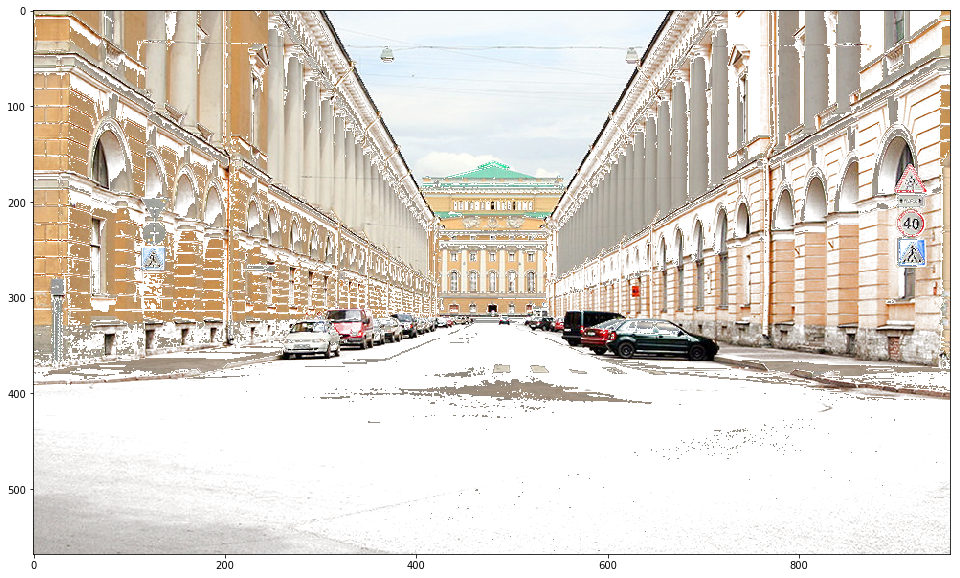

In [9]:
aug = albu.RandomSnow(p=1, brightness_coeff=2.5, snow_point_lower=0.3, snow_point_upper=0.5)
augment_and_show(aug, image)

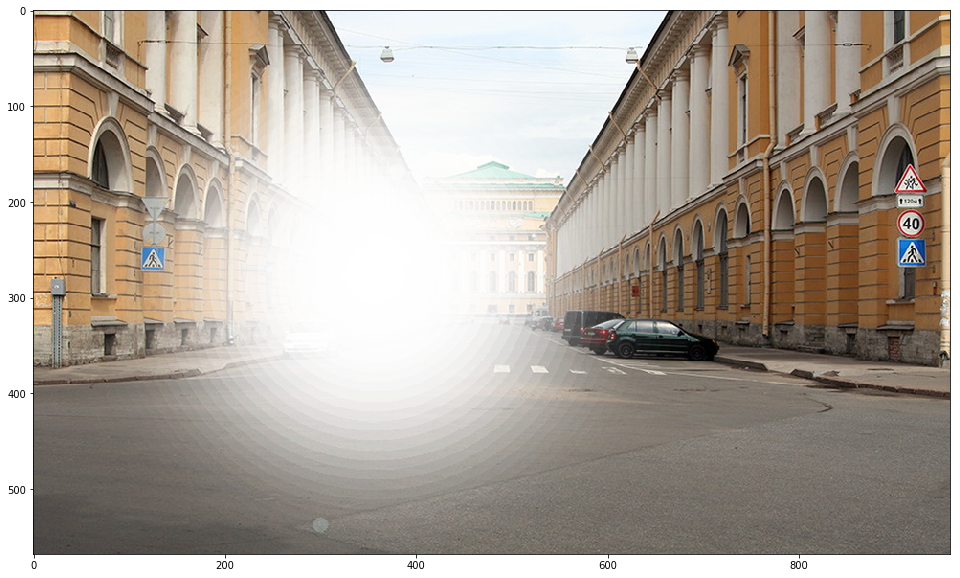

In [10]:
aug = albu.RandomSunFlare(p=1, flare_roi=(0, 0, 1, 0.5), angle_lower=0.5)

augment_and_show(aug, image)

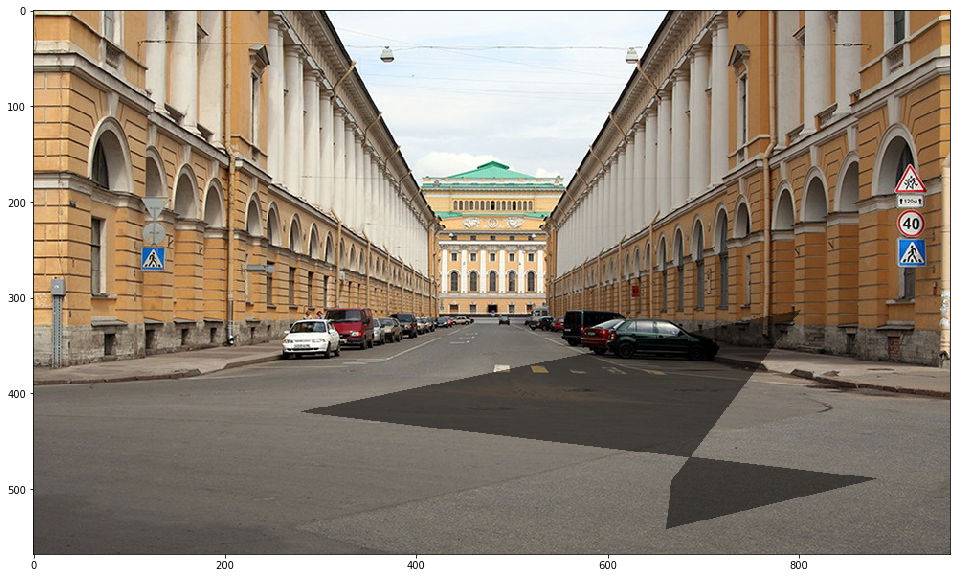

In [11]:
aug = albu.RandomShadow(p=1, num_shadows_lower=1, num_shadows_upper=1, 
                        shadow_dimension=5, shadow_roi=(0, 0.5, 1, 1))

augment_and_show(aug, image)

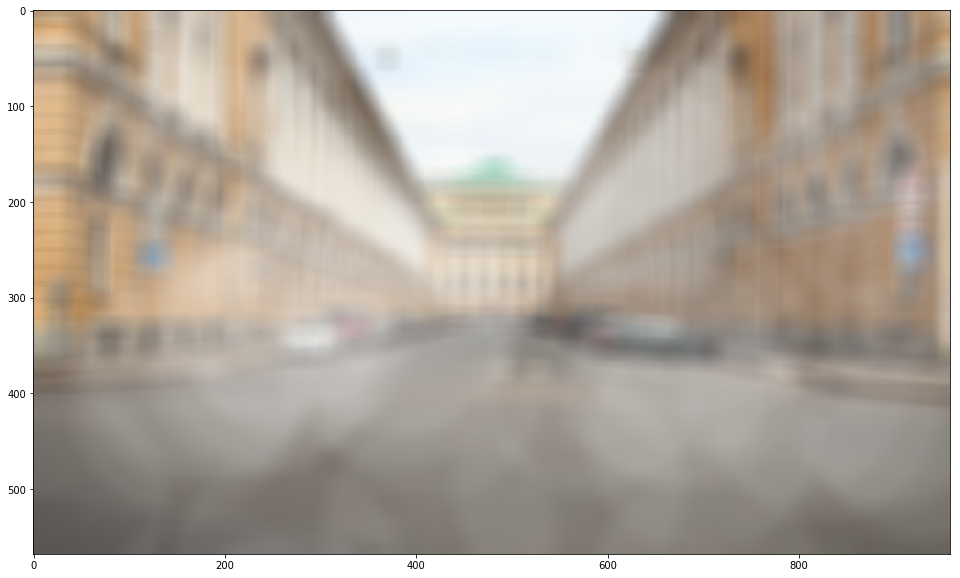

In [12]:
aug = albu.RandomFog(p=1, fog_coef_lower=0.7, fog_coef_upper=0.8, alpha_coef=0.1)

augment_and_show(aug, image)